# Excel report on IC analysis - continuation/ solving given tasks

# Table of content
## 1. Setting up
## 2. What’s the distribution among users in regards to their brand loyalty?
## 3. Are there differences in ordering habits based on a customer’s loyalty status?
## 4. Are there differences in ordering habits based on a customer’s region?
## 5. Is there a connection between age and family status in terms of ordering habits?
## 6. What different classifications does the demographic information suggest?
## 7. Creating customer profiles & more visualizations 

# 1. Setting up

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path for later import/export

path = r"C:\Users\Anwender\Documents\07-2023 Instacart Basket Analysis"

In [ ]:
# importing df

df = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "orders_products_high.pkl"))

In [3]:
pd.options.display.max_columns=None

In [ ]:
# importing departments_wrangled.csv for clarification

departments = pd.read_csv(os.path.join(path, "02 Data", "Prepared Data", "departments_wrangled.csv"), index_col = False)

In [ ]:
# checking departments.csv content

departments.head(20)

In [ ]:
# renaming "Unnamed: 0" column to "department_id"

departments.rename(columns = {"Unnamed: 0":"department_id"}, inplace = True)

In [ ]:
# merging departments with the rest of the df:

df_new = df.merge(departments, on = ["department_id"], indicator = True)

In [94]:
# checking output

df_new.head(10)

,user_id,Gender,State,Age,number_of_dependents,fam_status,income,order_id,amount_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_previous_order,order_frequency,Region,order_activity,department,_merge,maturity,has dependent,profile agexdependent,income level,sum_per_order
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,7,9.0,Mid-range product,Busiest days,Average orders,8,New customer,7,Low spender,19.0,Regular customer,Midwest,High activity,beverages,both,Middle age,with dependent,Adult with dependent,high income,17.299999
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Most orders,8,New customer,7,Low spender,19.0,Regular customer,Midwest,High activity,beverages,both,Middle age,with dependent,Adult with dependent,high income,25.900002
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,7,9.0,Mid-range product,Busiest days,Most orders,8,New customer,7,Low spender,19.0,Regular customer,Midwest,High activity,beverages,both,Middle age,with dependent,Adult with dependent,high income,25.900002
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,11,30.0,196,1,0,Soda,7,9.0,Mid-range product,Regularly busy,Most orders,12,Regular customer,7,Low spender,26.0,Non-frequent customer,West,High activity,beverages,both,Middle age,without dependent,Adult without dependent,high income,36.599998
4,33890,Female,New Mexico,36,0,single,59285,474720,4,1,20,16.0,196,6,1,Soda,7,9.0,Mid-range product,Busiest days,Average orders,12,Regular customer,7,Low spender,26.0,Non-frequent customer,West,High activity,beverages,both,Middle age,without dependent,Adult without dependent,high income,48.000000
5,33890,Female,New Mexico,36,0,single,59285,896617,5,6,22,26.0,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Average orders,12,Regular customer,7,Low spender,26.0,Non-frequent customer,West,High activity,beverages,both,Middle age,without dependent,Adult without dependent,high income,72.300003
6,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,11,30.0,40939,5,0,Drinking Water,7,1.6,Low-range product,Regularly busy,Most orders,12,Regular customer,7,Low spender,26.0,Non-frequent customer,West,High activity,beverages,both,Middle age,without dependent,Adult without dependent,high income,36.599998
7,65803,Male,Idaho,35,2,married,99568,3233494,6,2,13,4.0,196,5,0,Soda,7,9.0,Mid-range product,Regularly busy,Most orders,9,New customer,8,Low spender,7.0,Frequent customer,West,High activity,beverages,both,Middle age,with dependent,Adult with dependent,high income,48.099998
8,65803,Male,Idaho,35,2,married,99568,142275,8,1,13,3.0,196,2,1,Soda,7,9.0,Mid-range product,Busiest days,Most orders,9,New customer,8,Low spender,7.0,Frequent customer,West,High activity,beverages,both,Middle age,with dependent,Adult with dependent,high income,103.099998
9,65803,Male,Idaho,35,2,married,99568,3114332,9,1,12,7.0,196,1,1,Soda,7,9.0,Mid-range product,Busiest days,Most orders,9,New customer,8,Low spender,7.0,Frequent customer,West,High activity,beverages,both,Middle age,with dependent,Adult with dependent,high income,95.199997


In [26]:
# renaming values in "order_frequency" column to avoid common value names with values in "loyalty flag"

df_new['order_frequency'] = df_new['order_frequency'].str.replace('Regular customer', 'orders sometimes')
df_new['order_frequency'] = df_new['order_frequency'].str.replace('Frequent customer', 'orders frequently')
df_new['order_frequency'] = df_new['order_frequency'].str.replace('Non-frequent customer', 'orders seldomly')

In [30]:
# checking output

df_new["order_frequency"].value_counts(dropna = False)

orders frequently    21204476
orders sometimes      6865113
orders seldomly       2894975
Name: order_frequency, dtype: int64

In [159]:
# exporting df_new as the latest version df_all

df_new.to_pickle(os.path.join(path, "02 Data", "Prepared Data", "df_all.pkl"))

# 2. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

Text(0, 0.5, '')

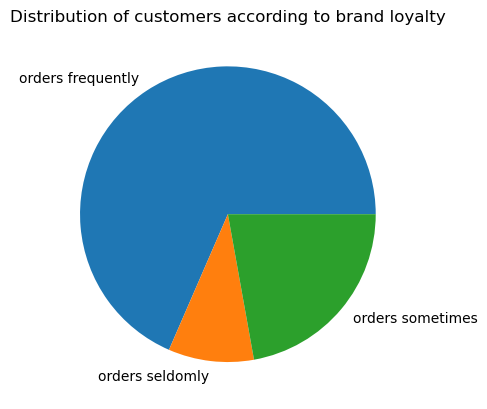

In [33]:
# pie chart for order_frequency distribution

pie_loyalty = df_new["order_frequency"].value_counts().sort_index().plot.pie()
plt.title("Distribution of customers according to brand loyalty")
plt.ylabel("")

In [34]:
# exporting pie_loyalty

pie_loyalty.figure.savefig(os.path.join(path,"04 Analysis", "Visualizations", "pie_frequ.png"))

### The majority of Instacart users are frequently returning to Instacart to reorder.

# 3.  Are there differences in ordering habits based on a customer’s loyalty status?

In [35]:
# creating a crosstab for loyalty_flag over order_frequency

crosstab4 = pd.crosstab(df_new["loyalty_flag"], df_new["order_frequency"], dropna = False)

print(crosstab4)

order_frequency   orders frequently  orders seldomly  orders sometimes
loyalty_flag                                                          
Loyal customer             10279960                0              4133
New customer                1293294          1983500           1526901
Regular customer            9631222           911475           5334079


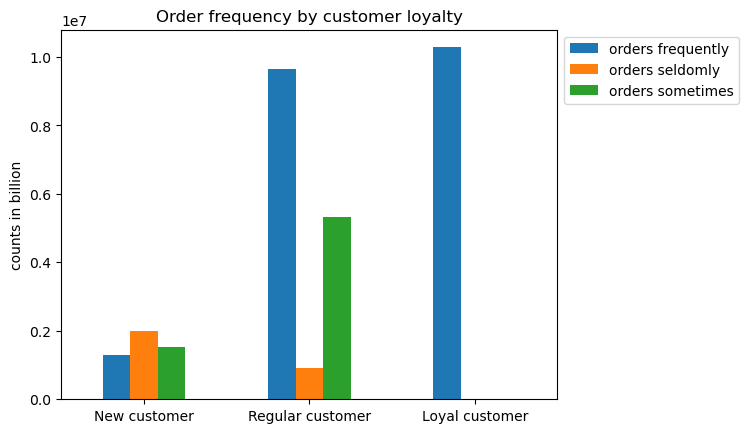

In [48]:
bar_loyalty_orderhabits = crosstab4.sort_values("orders frequently").plot(kind="bar", rot=0)
plt.title("Order frequency by customer loyalty")
plt.xlabel("")
plt.ylabel("counts in billion")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [49]:
# exporting bar_loyalty_orderhabits 

bar_loyalty_orderhabits.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "bar_loyaltyxof.png"))

### While there is barely a differentiation of order habits for new customers, one can see that the more loyal the customers are, the more frequently they order from Instacart as well. Most of the Regular customers and all of the loyal customers revisit and order again at Instacart in less than 10 days intervals.

# 4.  Are there differences in ordering habits based on a customer’s region?


In [50]:
# creating a crosstab to look at order_frequency per region

crosstab5 = pd.crosstab(df_new["Region"], df_new["order_frequency"], dropna = False)

print(crosstab5)

order_frequency  orders frequently  orders seldomly  orders sometimes
Region                                                               
Midwest                    4935393           690030           1636090
Northeast                  3740982           496911           1226792
South                      7073789           968006           2269344
West                       5454312           740028           1732887


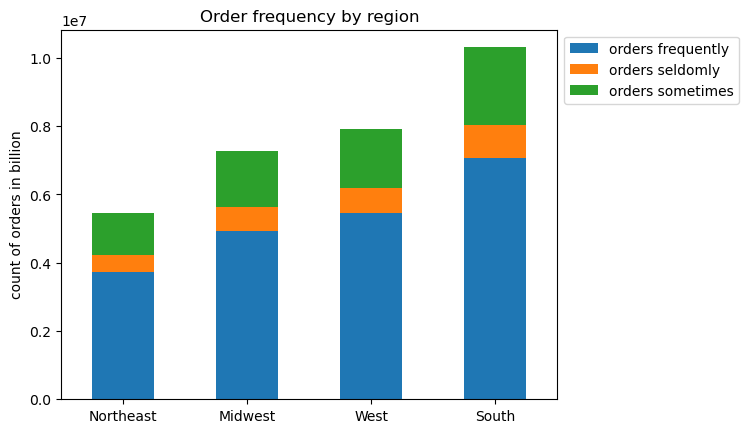

In [54]:
bar_region_orderhabits = crosstab5.sort_values("orders frequently").plot(kind="bar", stacked=True, rot=0)
plt.title("Order frequency by region")
plt.xlabel("")
plt.ylabel("count of orders in billion")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [55]:
# exporting bar_region_orderhabits 

bar_region_orderhabits.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "bar_regionxof.png"))

### Customers from the southern region order most often, whereas customers from the northeastern region order the least compared to the other regions. For every region, the majority of customers are those that order frequently at Instacart.

# 5. Is there a connection between age and family status in terms of ordering habits?


In [57]:
# creating a crosstab to look at Age and order_frequency 

crosstab8 = pd.crosstab(df_new["Age"], df_new["order_frequency"], dropna = False)

print(crosstab8)

order_frequency  orders frequently  orders seldomly  orders sometimes
Age                                                                  
18                          322725            49292            106440
19                          346502            42976            106599
20                          328062            47156            104976
21                          335752            45949            107415
22                          341872            45209            103730
..                             ...              ...               ...
77                          326769            46539            104691
78                          315536            41681            113902
79                          349999            47310            111028
80                          342402            45212            105136
81                          327375            46317            112155

[64 rows x 3 columns]


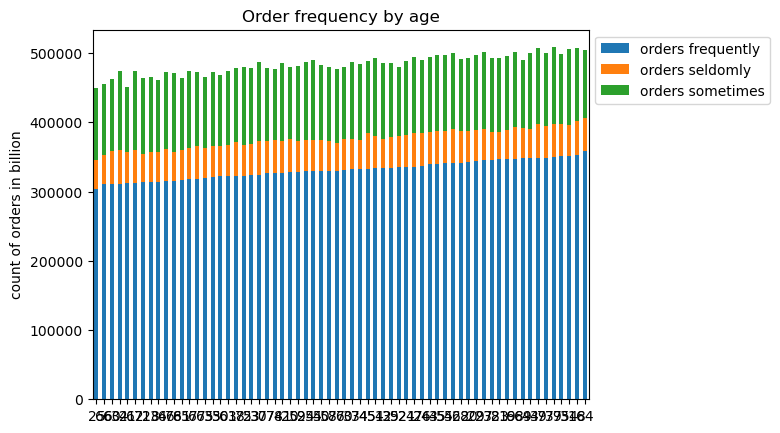

In [99]:
# didn't include this viz since it's not easily understandable and xticks overlap --> using profile1 age x dependent instead

bar_age_orderhabits = crosstab8.sort_values("orders frequently").plot(kind="bar", stacked=True, rot=0)
plt.title("Order frequency by age")
plt.xlabel("")
plt.ylabel("count of orders in billion")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [60]:
# creating a crosstab to look at family status and order_frequency 

crosstab9 = pd.crosstab(df_new["fam_status"], df_new["order_frequency"], dropna = False)

print(crosstab9)

order_frequency                   orders frequently  orders seldomly  \
fam_status                                                             
divorced/widowed                            1819123           243934   
living with parents and siblings            1030514           138646   
married                                    14888825          2039823   
single                                      3466014           472572   

order_frequency                   orders sometimes  
fam_status                                          
divorced/widowed                            582214  
living with parents and siblings            312012  
married                                    4815063  
single                                     1155824  


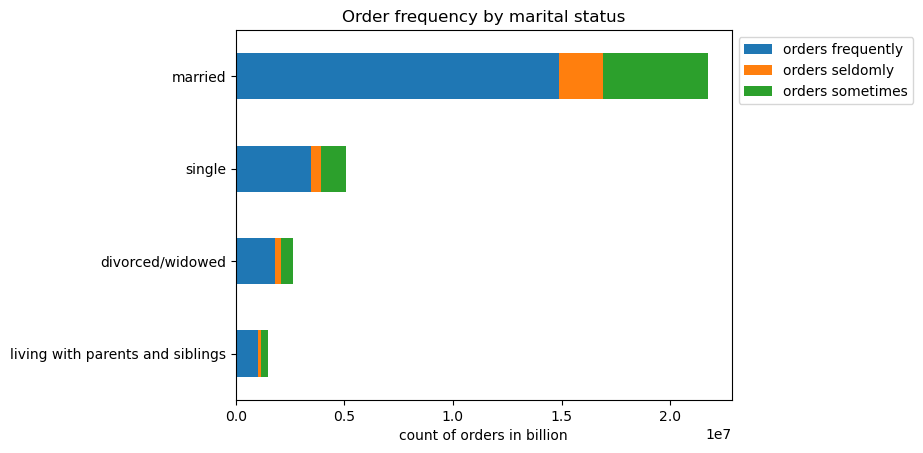

In [72]:
bar_marital_orderhabits = crosstab9.sort_values("orders frequently").plot(kind="barh", stacked=True, rot=0)
plt.title("Order frequency by marital status")
plt.ylabel("")
plt.xlabel("count of orders in billion")
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Most of the customers are married. The distribution of order frequencies is the same for every marital status.

# 6. What different classifications does the demographic information suggest?
## Age? Income? Certain types of goods? Family status?

In [63]:
# exploring family status

df_new["fam_status"].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [64]:
# exploring Age

df_new["Age"].mean()

49.4680256760599

In [70]:
df_new.groupby("order_frequency").agg({"Age":["mean", "min", "max"]})

Age        
                        mean min max
order_frequency                     
orders frequently  49.478878  18  81
orders seldomly    49.496016  18  81
orders sometimes   49.422703  18  81

In [ ]:
# creating Age profile: "maturity"

df_new.loc[df_new["Age"] >= 60, "maturity"] = "Old age"

In [ ]:
df_new.loc[(df_new["Age"] < 60) & (df_new["Age"] >= 35), "maturity"] = "Middle age"

In [ ]:
df_new.loc[df_new["Age"] < 35, "maturity"] = "Young age"

In [92]:
# checking output

df_new["maturity"].value_counts(dropna = False)

Middle age    12147765
Old age       10574504
Young age      8242295
Name: maturity, dtype: int64

In [ ]:
# creating dependents profile: "has dependent"

df_new.loc[df_new["number_of_dependents"] >= 1, "has dependent"] = "with dependent"

In [ ]:
df_new.loc[df_new["number_of_dependents"] == 0, "has dependent"] = "without dependent"

In [66]:
# checking output

df_new["has dependent"].value_counts(dropna = False)

with dependent       23224883
without dependent     7739681
Name: has dependent, dtype: int64

In [69]:
# exploring income

df_new.groupby("order_frequency").agg({"income":["mean", "min", "max"]})

income               
                            mean    min     max
order_frequency                                
orders frequently  100055.072242  25955  593901
orders seldomly     97542.010727  25911  544217
orders sometimes    99404.429883  25903  590790

In [101]:
df_new.groupby("maturity").agg({"income":["mean", "min", "max"]})

income               
                     mean    min     max
maturity                                
Middle age  105228.257378  25903  592409
Old age     115971.684913  29001  593901
Young age    70585.742974  25911  396364

In [141]:
df_new["income"].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [142]:
# defining income profile -- dropping this, since customers don't usually leave their income info when ordering online.

df_new.loc[df_new["income"] <= 67292, "income level"] = "low income"

In [143]:
df_new.loc[(df_new["income"] <= 128102) & (df_new["income"] > 67292), "income level"] = "medium income"

In [144]:
df_new.loc[df_new["income"] >128102, "income level"] = "high income"

In [145]:
df_new["income level"].value_counts(dropna = False)

medium income    15482125
low income        7741348
high income       7741091
Name: income level, dtype: int64

Text(0, 0.5, '')

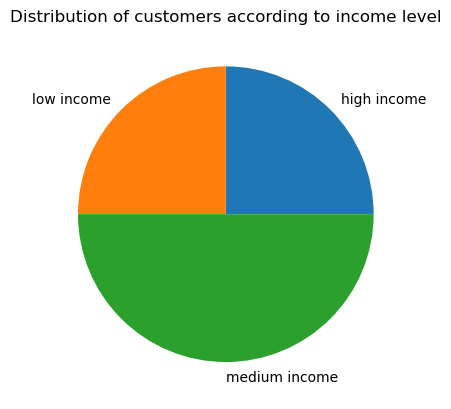

In [146]:
# not using this, as the division into those income levels was based on Quartiles and therefore wrongly assigned.

pie_income_level = df_new["income level"].value_counts().sort_index().plot.pie()
plt.title("Distribution of customers according to income level")
plt.ylabel("")

In [13]:
# exporting pie chart

pie_income_level.figure.savefig(os.path.join(path,"04 Analysis", "Visualizations", "pie_income_lvl.png"))

In [5]:
# creating df with frequency check of product_id

product_counts = df_new['product_id'].value_counts()

In [6]:
# defining N = 10 for top ten product_id

N = 10

In [7]:
# creating new df top_products with N frequent product_ids

top_products = product_counts.head(N).index

In [8]:
# checking output

top_products

Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209,
            27845],
           dtype='int64')

In [11]:
# creating new df with N frequent product_ids filtered out of df_new

filtered_df = df_new[df_new['product_id'].isin(top_products)]

In [10]:
print(filtered_df)

          user_id  Gender     State  Age  number_of_dependents fam_status  \
2572044     82820    Male  Virginia   26                     2    married   
2572045     82820    Male  Virginia   26                     2    married   
2572046     82820    Male  Virginia   26                     2    married   
2572047     82820    Male  Virginia   26                     2    married   
2572048     82820    Male  Virginia   26                     2    married   
...           ...     ...       ...  ...                   ...        ...   
16828253   197067  Female   Arizona   42                     0     single   
16828254   197067  Female   Arizona   42                     0     single   
16828255   197067  Female   Arizona   42                     0     single   
16828256   197067  Female   Arizona   42                     0     single   
16828257   197067  Female   Arizona   42                     0     single   

          income  order_id  amount_of_orders  orders_day_of_week  \
2572044

Text(0.5, 0, 'count of orders')

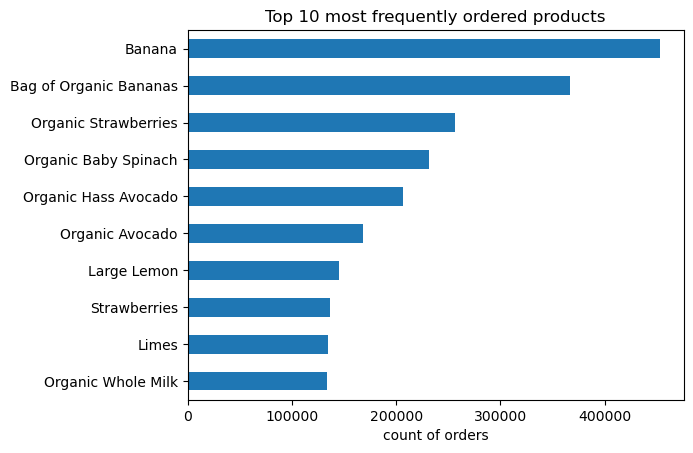

In [84]:
bar_product = filtered_df["product_name"].value_counts().sort_values().plot.barh()
plt.title("Top 10 most frequently ordered products")
plt.ylabel("")
plt.xlabel("count of orders")

### 9 out of 10 most frequently ordered products are produce. This suggests that instacart customers primarily use the App for groceries. 6 out of 10 are products labelled as "organic". This suggests that customers prefer organic food.

# 7. Creating customer profiles

In [ ]:
# combining "maturity" & "has dependent" to create "profile agexdependent":

df_new.loc[(df_new["maturity"] == "Old age") & (df_new["has dependent"] == "with dependent"), 
           "profile agexdependent"] = "Senior with dependent"

In [ ]:
df_new.loc[(df_new["maturity"] == "Old age") & (df_new["has dependent"] == "without dependent"), 
           "profile agexdependent"] = "Senior without dependent"

In [ ]:
df_new.loc[(df_new["maturity"] == "Middle age") & (df_new["has dependent"] == "with dependent"), 
           "profile agexdependent"] = "Adult with dependent"

In [ ]:
df_new.loc[(df_new["maturity"] == "Middle age") & (df_new["has dependent"] == "without dependent"), 
           "profile agexdependent"] = "Adult without dependent"

In [ ]:
df_new.loc[(df_new["maturity"] == "Young age") & (df_new["has dependent"] == "with dependent"), 
           "profile agexdependent"] = "Young Adult with dependent"

In [ ]:
df_new.loc[(df_new["maturity"] == "Young age") & (df_new["has dependent"] == "without dependent"), 
           "profile agexdependent"] = "Young Adult without dependent"

In [28]:
# renaming values "with dependent" to "+1" for abbreviation in charts

df_new['profile agexdependent'] = df_new['profile agexdependent'].str.replace(' with dependent', '+1')

In [29]:
# renaming values "without dependent" to " " for abbreviation in charts

df_new['profile agexdependent'] = df_new['profile agexdependent'].str.replace(' without dependent', ' ')

In [93]:
# checking output

df_new["profile agexdependent"].value_counts(dropna =False)

Adult+1          9116913
Senior+1         7929233
Young Adult+1    6178737
Adult            3030852
Senior           2645271
Young Adult      2063558
Name: profile agexdependent, dtype: int64

In [ ]:
# creating visualization

bar_agexdep = df_new["profile agexdependent"].value_counts(ascending = True).plot.barh(color = ["lightgreen", "lightgreen", "lightgreen", "green", "green", "green"])
plt.title("Distribution of customers according to age and dependents")
plt.xlabel("Number of customers per million")

#### In this chart we can see that most of the Instacart customers are people with dependents.

In [ ]:
# exporting bar_agexdep

bar_agexdep.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "bar_agexdep.png"))

In [156]:
# creating sum_per_order column for the total amount spent per order

df_new["sum_per_order"] = df_new.groupby("order_id")["prices"].transform(np.sum)

In [158]:
df_new.head(5)

,user_id,Gender,State,Age,number_of_dependents,fam_status,income,order_id,amount_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_previous_order,order_frequency,Region,order_activity,department,_merge,maturity,has dependent,profile agexdependent,income level,sum_per_order
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,7,9.0,Mid-range product,Busiest days,Average orders,8,New customer,7,Low spender,19.0,orders sometimes,Midwest,High activity,beverages,both,Middle age,with dependent,Adult+1,high income,17.299999
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Most orders,8,New customer,7,Low spender,19.0,orders sometimes,Midwest,High activity,beverages,both,Middle age,with dependent,Adult+1,high income,25.900002
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,7,9.0,Mid-range product,Busiest days,Most orders,8,New customer,7,Low spender,19.0,orders sometimes,Midwest,High activity,beverages,both,Middle age,with dependent,Adult+1,high income,25.900002
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,11,30.0,196,1,0,Soda,7,9.0,Mid-range product,Regularly busy,Most orders,12,Regular customer,7,Low spender,26.0,orders seldomly,West,High activity,beverages,both,Middle age,without dependent,Adult,low income,36.599998
4,33890,Female,New Mexico,36,0,single,59285,474720,4,1,20,16.0,196,6,1,Soda,7,9.0,Mid-range product,Busiest days,Average orders,12,Regular customer,7,Low spender,26.0,orders seldomly,West,High activity,beverages,both,Middle age,without dependent,Adult,low income,48.000000


In [157]:
df_new.groupby("order_id")["prices"].sum()

order_id
2           91.599998
3           70.300003
4           92.799995
5          210.699997
6           27.500000
              ...    
3421079      1.600000
3421080     75.800003
3421081     79.000000
3421082     56.400002
3421083     69.400002
Name: prices, Length: 3064375, dtype: float32

In [160]:
# checking individual prices with newly created sum_per_order value

df_new.loc[df_new["order_id"] == 2]

,user_id,Gender,State,Age,number_of_dependents,fam_status,income,order_id,amount_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days_previous_order,order_frequency,Region,order_activity,department,_merge,maturity,has dependent,profile agexdependent,income level,sum_per_order
7500005,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,33120,1,1,Organic Egg Whites,16,11.3,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,dairy eggs,both,Middle age,with dependent,Adult+1,medium income,91.599998
16392014,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,28985,2,1,Michigan Organic Kale,4,13.4,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,produce,both,Middle age,with dependent,Adult+1,medium income,91.599998
16392019,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,17794,6,1,Carrots,4,10.7,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,produce,both,Middle age,with dependent,Adult+1,medium income,91.599998
16392029,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,43668,9,0,Classic Blend Cole Slaw,4,7.5,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,produce,both,Middle age,with dependent,Adult+1,medium income,91.599998
22303179,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,1819,8,1,All Natural No Stir Creamy Almond Butter,13,11.5,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,pantry,both,Middle age,with dependent,Adult+1,medium income,91.599998
22303183,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,45918,4,1,Coconut Butter,13,8.4,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,pantry,both,Middle age,with dependent,Adult+1,medium income,91.599998
22303188,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,9327,3,0,Garlic Powder,13,3.6,Low-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,pantry,both,Middle age,with dependent,Adult+1,medium income,91.599998
22303196,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,40141,7,1,Original Unflavored Gelatine Mix,13,11.5,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,pantry,both,Middle age,with dependent,Adult+1,medium income,91.599998
22303211,202279,Male,Idaho,57,3,married,98119,2,3,5,9,8.0,30035,5,0,Natural Sweetener,13,13.7,Mid-range product,Regularly busy,Average orders,8,New customer,8,Low spender,24.0,orders seldomly,West,High activity,pantry,both,Middle age,with dependent,Adult+1,medium income,91.599998


In [35]:
# exploring customer profiles via frequency usage and expenditure:

df_new.groupby("profile agexdependent").agg({"sum_per_order":["mean", "min", "max"]})

sum_per_order                  
                                       mean  min          max
profile agexdependent                                        
Adult with dependent             122.544640  0.0  1092.199951
Adult without dependent          121.104820  0.0   712.000000
Senior with dependent            121.640160  0.0   787.000000
Senior without dependent         122.430283  0.0   875.000000
Young Adult with dependent       123.052429  0.0   842.099976
Young Adult without dependent    122.026680  0.0   624.299988

#### The average sum per order is the same for all profiles.

In [97]:
# creating crosstab for profile age x dependent over order_frequency

crosstab2 = pd.crosstab (df_new["profile agexdependent"], df_new["order_frequency"], dropna = False)

In [37]:
# checking output

crosstab2

order_frequency,Frequent customer,Non-frequent customer,Regular customer
profile agexdependent,,,
Adult with dependent,6244649,859181,2013083
Adult without dependent,2073349,278652,678851
Senior with dependent,5433095,746604,1749534
Senior without dependent,1819123,243934,582214
Young Adult with dependent,4241595,572684,1364458
Young Adult without dependent,1392665,193920,476973


Text(0, 0.5, '')

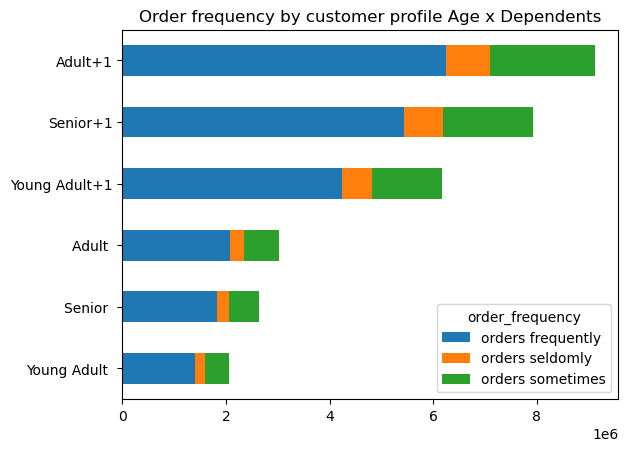

In [98]:
bar_profile1_orders = crosstab2.sort_values("orders frequently").plot(kind="barh", stacked=True, rot=0)
plt.title("Order frequency by customer profile Age x Dependents")
plt.ylabel("")

In [25]:
# exporting chart

bar_profile1_orders.figure.savefig(os.path.join(path,"04 Analysis", "Visualizations", "bar_agexdep_orders.png"))

In [167]:
# exploring connection between profile agexdependent and sum_per_order

orders_sum_profiles = df_new.groupby(['sum_per_order','profile agexdependent']).size().unstack(fill_value=0)

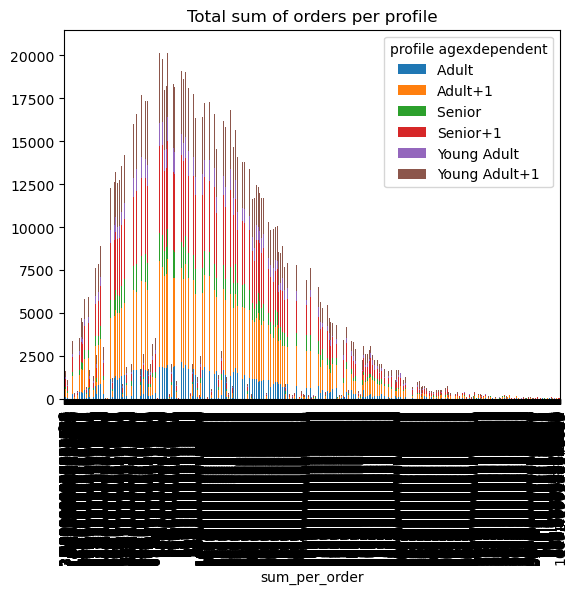

In [168]:
# not using this since it's not readable

stacked_profile_sums = orders_sum_profiles.plot.bar(stacked = True, title = 'Total sum of orders per profile')

In [181]:
# exploring profile income level for expenditure and order frequency

df_new.groupby("income level").agg({"sum_per_order":["mean", "min", "max"]})

sum_per_order                  
                       mean  min          max
income level                                 
high income      126.153702  0.0  1047.400024
low income       109.271065  1.0   875.000000
medium income    126.746109  0.0  1092.199951

In [130]:
# crosstab for income levels over order frequency

crosstab3 = pd.crosstab (df_new["income level"], df_new["order_frequency"], dropna = False)
print(crosstab3)

order_frequency  orders frequently  orders seldomly  orders sometimes
income level                                                         
high income                6316243           835799           2027471
low income                 3879096           620236           1303969
medium income             11009137          1438940           3533673


Text(0, 0.5, '')

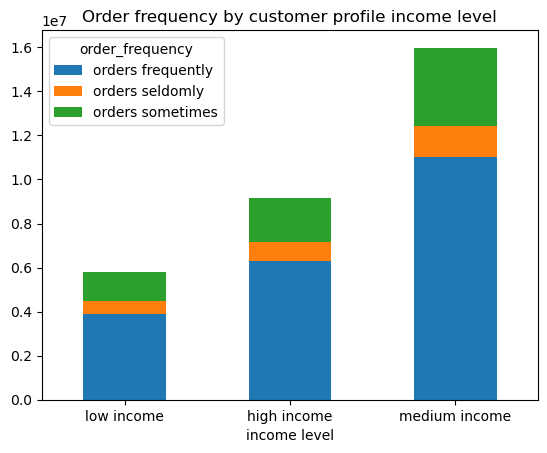

In [132]:
bar_profile2_orders = crosstab3.sort_values("orders frequently").plot(kind="bar", stacked=True, rot=0)
plt.title("Order frequency by customer profile income level")
plt.ylabel("")

In [31]:
# exporting bar chart

bar_profile2_orders.figure.savefig(os.path.join(path,"04 Analysis", "Visualizations", "bar_income_orders.png"))

Text(0.5, 1.0, 'Departments by order frequency')

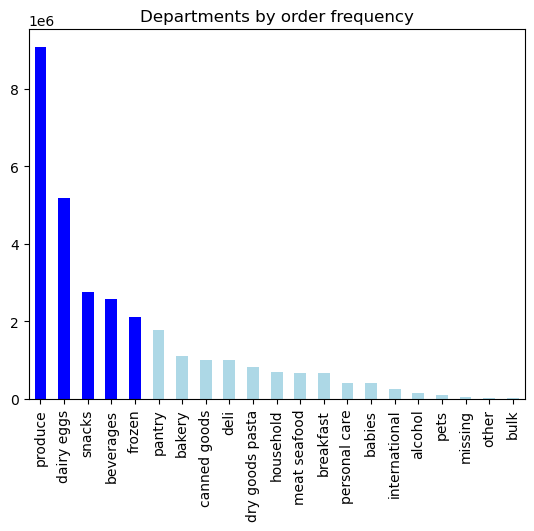

In [58]:
# creating viz for departments with highest frequency of orders

bar_dep = df_new["department"].value_counts(dropna= False).plot.bar(color=["blue","blue","blue","blue","blue","lightblue", "lightblue","lightblue", "lightblue","lightblue", "lightblue","lightblue", "lightblue","lightblue", "lightblue","lightblue", "lightblue","lightblue", "lightblue","lightblue", "lightblue",])
plt.title("Departments by order frequency")

In [14]:
# finding most popular departments:

df_new["department"].value_counts(dropna = False) [:5]

produce       9079273
dairy eggs    5177182
snacks        2766406
beverages     2571901
frozen        2121731
Name: department, dtype: int64

#### 5 strongest selling departments: produce, dairy eggs, snacks, beverages, frozen

In [133]:
# exploring how the customer profiles shop

crosstab10 = pd.crosstab (df_new["department"], df_new["profile agexdependent"], dropna = False)

order_frequency  orders frequently  orders seldomly  orders sometimes
income level                                                         
high income                6316243           835799           2027471
low income                 3879096           620236           1303969
medium income             11009137          1438940           3533673


Text(0.5, 0, 'orders per million')

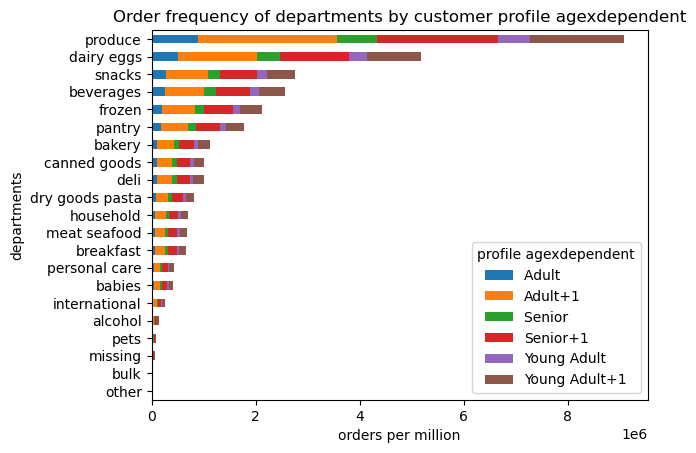

In [147]:
bar_profile_dep = crosstab10.sort_values("Adult+1").plot(kind="barh", stacked=True, rot=0)
plt.title("Order frequency of departments by customer profile agexdependent")
plt.ylabel("departments")
plt.xlabel ("orders per million")

In [140]:
# exporting bar_dep

bar_profile_dep.figure.savefig(os.path.join(path,"04 Analysis", "Visualizations", "bar_profile_dep.png"))

In [148]:
# crosstabbing popular products with agexdependent profile

crosstab11 = pd.crosstab (filtered_df["product_name"], df_new["profile agexdependent"], dropna = False)

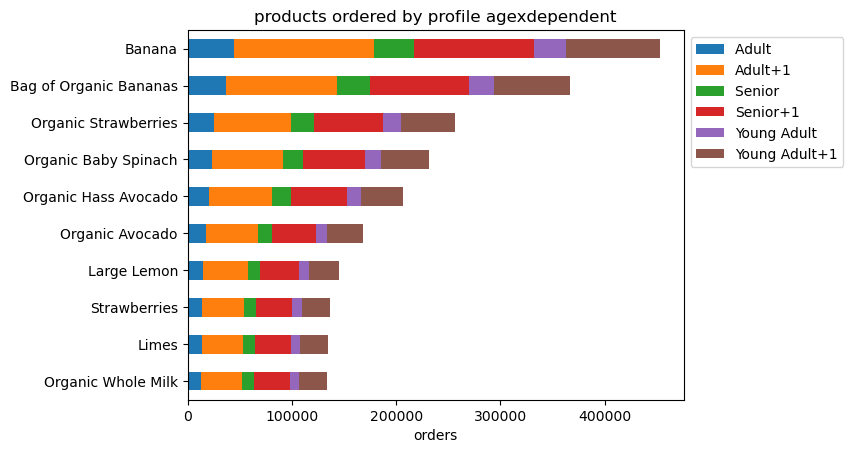

In [176]:
# dividing the top 10 products by profile agexdependent

bar_product_profile1 = crosstab11.sort_values("Adult+1").plot(kind="barh", stacked= True, rot=0)
plt.title("products ordered by profile agexdependent")
plt.xlabel("orders")
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [170]:
# looking at profile agexdependent habit of ordering differently priced products

crosstab7 = pd.crosstab(df_new["profile agexdependent"], df_new["price_range_loc"], dropna = False)

print(crosstab7)

price_range_loc        High-range product  Low-range product  \
profile agexdependent                                          
Adult                               37615             946559   
Adult+1                            117808            2849626   
Senior                              34134             826382   
Senior+1                           102798            2475662   
Young Adult                         25706             646297   
Young Adult+1                       79892            1930314   

price_range_loc        Mid-range product  
profile agexdependent                     
Adult                            2046678  
Adult+1                          6149479  
Senior                           1784755  
Senior+1                         5350773  
Young Adult                      1391555  
Young Adult+1                    4168531  


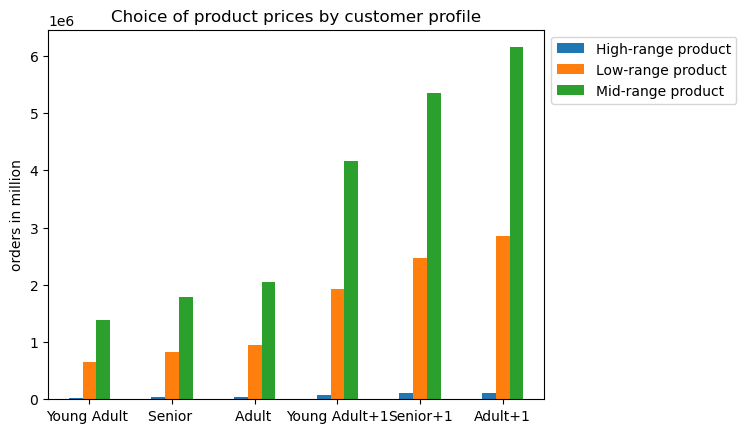

In [173]:
bar_profile1_prices = crosstab7.sort_values("Mid-range product").plot(kind="bar", rot=0)
plt.title("Choice of product prices by customer profile")
plt.xlabel("")
plt.ylabel("orders in million")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [175]:
# exporting bar_profile1_prices

bar_profile1_prices.figure.savefig(os.path.join(path,"04 Analysis", "Visualizations", "bar_profile_prices.png"))

In [177]:
# exploring connection between profile agexdependent and spending_flag

crosstab20 = pd.crosstab(df_new["profile agexdependent"], df_new["spending_flag"], dropna = False)

print(crosstab20)

spending_flag          High spender  Low spender
profile agexdependent                           
Adult                         62189      2968663
Adult+1                      184557      8932356
Senior                        50321      2594950
Senior+1                     156847      7772386
Young Adult                   33532      2030026
Young Adult+1                115979      6062758


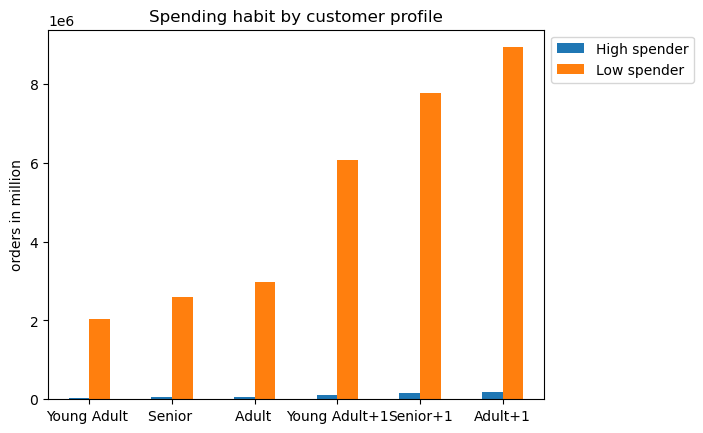

In [178]:
bar_profile1_spenders = crosstab20.sort_values("Low spender").plot(kind="bar", rot=0)
plt.title("Spending habit by customer profile")
plt.xlabel("")
plt.ylabel("orders in million")
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [179]:
# exporting viz

bar_profile1_spenders.figure.savefig(os.path.join(path,"04 Analysis", "Visualizations", "bar_profile_spenders.png"))